In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/CarsData.csv')

In [4]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


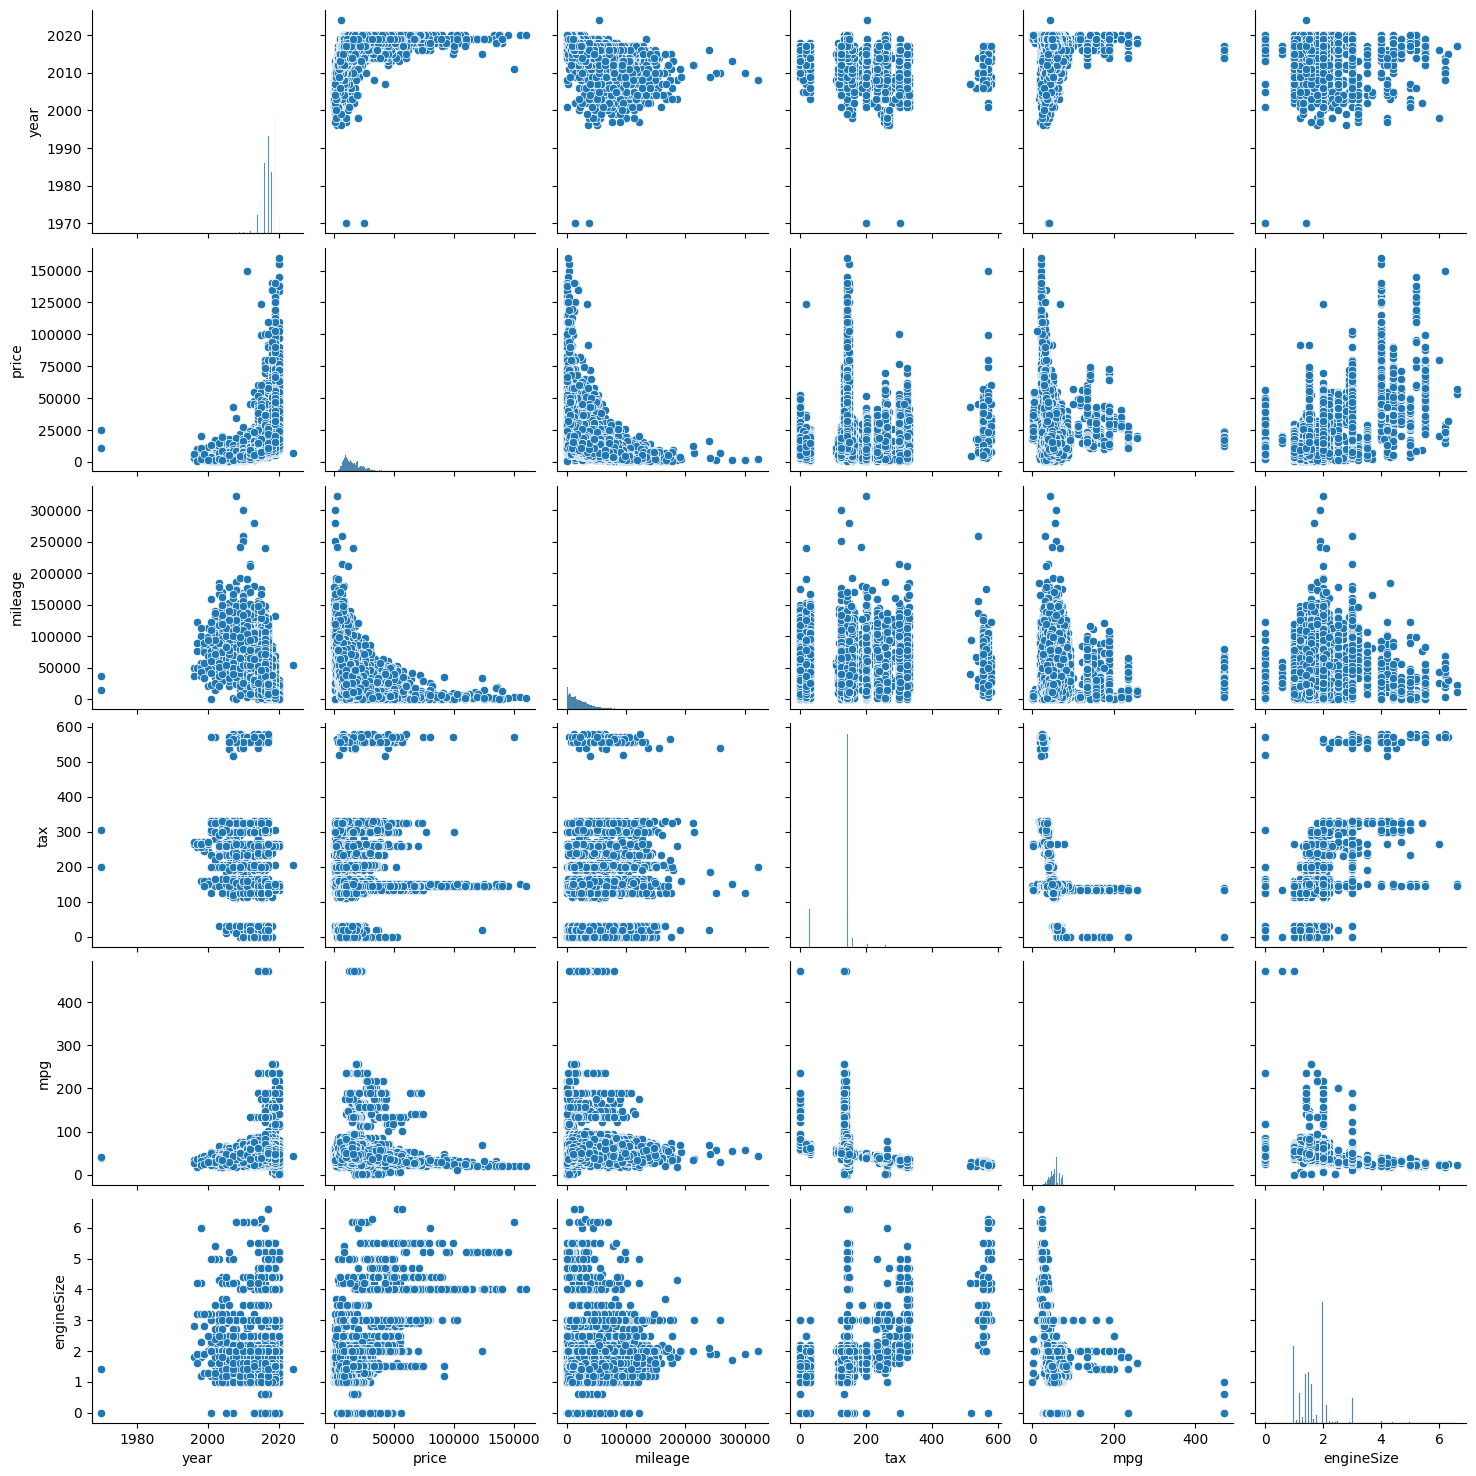

In [5]:
sns.pairplot(data=data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [7]:
data['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'Other'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [9]:
data['transmission_enc'] = enc.fit_transform(data['transmission'])

In [10]:
data['fuelType_enc'] = enc.fit_transform(data['fuelType'])

In [11]:
data['Manufacturer_enc'] = enc.fit_transform(data['Manufacturer'])

In [12]:
data['Manufacturer'].nunique()

9

In [13]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,transmission_enc,fuelType_enc,Manufacturer_enc
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi,1,4,3
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen,1,4,8
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,3,0,1
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda,1,0,5
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford,1,4,2


([<matplotlib.axis.XTick at 0x78ff630c3be0>,
 [Text(0, 0, 'hyundi'),
  Text(1, 0, 'volkswagen'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'skoda'),
  Text(4, 0, 'ford'),
  Text(5, 0, 'toyota'),
  Text(6, 0, 'merc'),
  Text(7, 0, 'vauxhall'),
  Text(8, 0, 'Audi')])

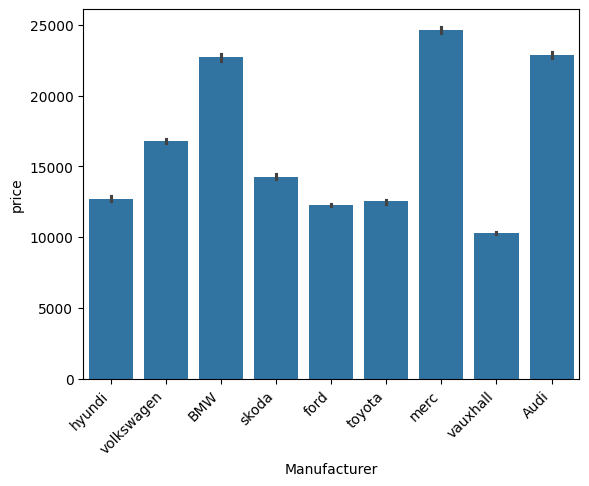

In [14]:
sns.barplot(x='Manufacturer', y='price', data=data)
xticks = plt.xticks()[0]
plt.xticks(xticks, rotation=45, ha='right')

<ipython-input-15-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

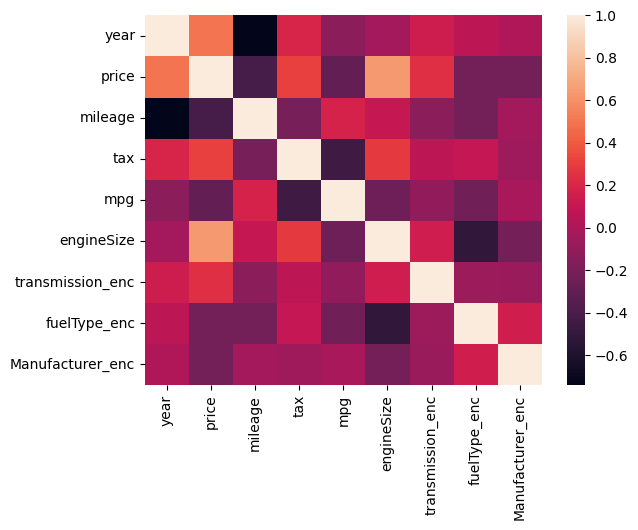

In [15]:
sns.heatmap(data.corr())

**Price majorly depends on Engine size and year.**
**Price is negatively depends on mileage and mpg**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             97712 non-null  object 
 1   year              97712 non-null  int64  
 2   price             97712 non-null  int64  
 3   transmission      97712 non-null  object 
 4   mileage           97712 non-null  int64  
 5   fuelType          97712 non-null  object 
 6   tax               97712 non-null  int64  
 7   mpg               97712 non-null  float64
 8   engineSize        97712 non-null  float64
 9   Manufacturer      97712 non-null  object 
 10  transmission_enc  97712 non-null  int64  
 11  fuelType_enc      97712 non-null  int64  
 12  Manufacturer_enc  97712 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 9.7+ MB


In [17]:
x=data[['year','mileage', 'tax', 'mpg', 'transmission_enc', 'fuelType_enc', 'Manufacturer_enc', 'engineSize']]
y=data['price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.25)

In [20]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [21]:
model1.fit(X_train, y_train)
pred=model1.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
score=mean_absolute_error(pred, y_test)
score

3498.29457049667

In [23]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(random_state=10, n_estimators=500)

In [24]:
model2.fit(X_train, y_train)
pred2= model2.predict(X_test)
score=mean_absolute_error(pred2, y_test)
score

1375.0166860313466

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=10)
model3 = model3.fit(X_train,y_train)

In [25]:
pred3= model3.predict(X_test)
score=mean_absolute_error(pred3, y_test)
score

5768.55080235795

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor( n_estimators= 500,max_depth= 4,min_samples_split= 5,learning_rate= 0.01,loss= "squared_error",)

In [27]:
model3.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [28]:
score=mean_absolute_error(y_test, model3.predict(X_test))
score

2135.995500039071

### From all models we found that RandomForestRegressor proved to give the least error hence mazimum accuracy till now